# Start: Analysiere Daten

In [112]:
# import initial_data.csv
import pandas as pd
import numpy as np

from feasibility import is_feasible

# import data from csv file
def import_data():
    data = pd.read_csv('initial_data.csv')
    return data

data = import_data()

In [113]:
# import queried data
import csv
import re

def read_csv_file(file_path):
    # Initialisiere eine leere Liste, um die bereinigten Daten zu speichern
    cleaned_data = []

    # Lese die CSV-Datei
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')  # Annahme: Semikolon als Trennzeichen
        for row in reader:
            # Verbinde die Zeilenelemente mit einem Komma, um das Trennzeichen zu vereinheitlichen
            unified_row = ','.join(row)
            # Ersetze mehrere aufeinander folgende Kommas durch ein einzelnes Komma
            unified_row = re.sub(r',+', ',', unified_row)
            # Teile die vereinheitlichte Zeile nach dem Komma auf
            split_row = unified_row.split(',')
            # Entferne die ersten zwei Parameter
            cleaned_row = split_row[1:]
            # Füge die bereinigte Zeile der Liste hinzu
            cleaned_data.append(cleaned_row)

    return cleaned_data

# Beispiel: Daten aus "input.csv" einlesen
input_file_path = "querys_ForcePush.csv"
cleaned_data = read_csv_file(input_file_path)

# Bereinigte Daten als pandas DataFrame speichern mit erster Zeile als Spaltennamen
df_queried = pd.DataFrame(cleaned_data[1:], columns=cleaned_data[0])


# Bereinigte Daten ausgeben
# print(df_queried)
# df_queried = pd.DataFrame(cleaned_data)

In [114]:
def add_data(data, queried_data):
    # add queried data (without cost) to initial data
    data = pd.concat([data, queried_data.iloc[:, :13]], axis=0)
    return data

data = add_data(data, df_queried)
# print(data)

### Functions to handle data

In [115]:
def get_input_data(data, row):
    x1, x2, x3, x4, x5, x6, x7, x8 = data.iloc[row, 0], data.iloc[row, 1], data.iloc[row, 2], data.iloc[row, 3], data.iloc[row, 4], data.iloc[row, 5], data.iloc[row, 6], data.iloc[row, 7]
    return x1, x2, x3, x4, x5, x6, x7, x8

def get_output_data(row):
    x1, x2, x3, x4, x5 = data.iloc[row, 8], data.iloc[row, 9], data.iloc[row, 10], data.iloc[row, 11], data.iloc[row, 12]
    return x1, x2, x3, x4, x5

def get_critical_output_data(i):
    x1, x2, x3 = data.iloc[i, 9], data.iloc[i, 11], data.iloc[i, 12]
    return x1, x2, x3

## Import Submission-Data

In [116]:
# import submission data
submission_data = pd.read_csv('submission.csv')
# print(submission_data)

## Get equally distributed among Speed and Load new data points to query

In [128]:
# get 10 new data points from submission which are equally distributed among 'Eingine Speed' and 'Engine Load'
# and are feasible
def get_new_data_points(data, nmbOfPoints):
    new_data_points = []
    data = data.astype(float)
    # get equally distributed data points
    # get 10 equally distributed data points from 'Engine speed' between 'engine speed'.min und 'engine speed'.max
    min_speed = data['Speed'].min()
    max_speed = data['Speed'].max()
    speed_range = np.linspace(min_speed, max_speed, nmbOfPoints +1) # +1, da wir n Bereiche für n-1 Grenzen erstellen
    # get 10 equally distributed data points from 'Engine load' between 'engine load'.min und 'engine load'.max
    # divide the data in the ranges of the speed_range
    # Zuordnen der Datenpunkte zu den Bereichen
    data['SpeedRange'] = pd.cut(data['Speed'], bins=speed_range, include_lowest=True, labels=range(nmbOfPoints))

    # Jetzt können Sie die Daten basierend auf 'SpeedRange' gruppieren und weiterverarbeiten
    # Beispiel: Zugriff auf die Datenpunkte in jedem Bereich
    for i in range(nmbOfPoints):
        data_in_range = data[data['SpeedRange'] == i]
        # print(len(data_in_range))
        # Führen Sie hier Operationen mit data_in_range durch, z.B. den nächstgelegenen Punkt zu einem bestimmten Wert finden
        min_load = data_in_range['Load'].min()
        max_load = data_in_range['Load'].max()
        load_range = np.linspace(min_load, max_load, nmbOfPoints)
        # sort data_in_range by 'Load'
        data_in_range = data_in_range.sort_values(by='Load')
        for i in range(nmbOfPoints):
            # get input data from from submission which are nearest to the load_range[i]
            load = load_range[i]
            # get the nearest data point to the load
            idx = (data['Load'] - load).abs().argsort()[:1].values[0]
            # get the nearest data point
            x1, x2, x3, x4, x5, x6, x7, x8 = get_input_data(data, idx)
            new_data_points.append([x1, x2, x3, x4, x5, x6, x7, x8])
    return new_data_points

new_data_points = get_new_data_points(submission_data, 5)
#print(new_data_points)

# print as formatted string seperated by semi-colon
def print_data(data):
    for i in range(len(data)):
        print(';'.join(map(str, data[i])))
    return

print_data(new_data_points)

858.6470916867256;0.0102736991704484;1515.682283144068;338.4671985828048;-0.264037309680134;2036.148480377857;1035.6354114650649;68.28402449665094
693.6874359846115;34.83799151841293;908.7112953023676;277.50118742069975;7.082831505686045;2578.752956422796;1496.654866438905;43.73892192648066
1684.5067530870438;69.6664109378008;2288.297326002142;681.3385673195949;-3.805208731034944;1894.808599873708;2350.6831892974737;70.63407004149516
1221.1424604058266;104.4944353029132;1581.9612763045996;389.8250490396304;3.121223116759211;2575.4135211883367;2618.2012457071337;52.99581318615692
965.1808708906174;139.32161320283694;1772.570622499623;384.02338627166495;-0.9525053296238184;2082.797440859837;2437.8482286856824;53.35982663542906
1278.6876380443573;0.0004049949347972;2154.0824080662405;143.864753037998;-2.9911182541400194;1624.4552206321778;2234.8187644288237;47.345782026454586
1341.0466372966766;42.37513806670904;1487.0190981028832;697.9715264681604;0.8411593828350306;1540.6158780007604;34

In [89]:
# put column names into a list
column_names = data.columns.values
#print(column_names)
inputs = column_names[0:8]
print("Inputs: ", inputs)
outputs = column_names[8:13]
print("Outputs: ", outputs)

Inputs:  ['Engine speed' 'Engine load' 'Railpressure' 'Air supply' 'Crank angle'
 'Intake pressure' 'Back pressure' 'Intake temperature']
Outputs:  ['NOx' 'PM 1' 'CO2' 'PM 2' 'Pressure cylinder']


In [107]:
import pandas as pd
import statsmodels.api as sm

# Angenommen, df ist Ihr DataFrame mit den Spalten 'Speed', 'Load' und anderen Input-Parametern
# df erste 8 Spalten von data
df = data.iloc[:, 0:8]

# Schritt 2: Korrelationsanalyse
correlation_matrix = df.corr()
print(correlation_matrix[['Engine speed', 'Engine load']])

# Schritt 3: Multivariate Regression für einen Parameter 'Param1' als abhängige Variable
X = df[['Engine speed', 'Engine load']]  # Unabhängige Variablen
X = sm.add_constant(X)  # Fügt eine Konstante hinzu, um den Achsenabschnitt zu berücksichtigen
y_RP = df['Railpressure']  # Abhängige Variable
y_AS = df['Air supply']
y_CA = df['Crank angle']
y_IP = df['Intake pressure']
y_BP = df['Back pressure']
y_IT = df['Intake temperature']

model_RP = sm.OLS(y_RP, X).fit()  # Erstellt und passt das Modell an
#print(model_RP.summary())  # Zeigt die Ergebnisse

model_AS = sm.OLS(y_AS, X).fit()  # Erstellt und passt das Modell an
#print(model_AS.summary())  # Zeigt die Ergebnisse

model_CA = sm.OLS(y_CA, X).fit()  # Erstellt und passt das Modell an
#print(model_CA.summary())  # Zeigt die Ergebnisse

model_IP = sm.OLS(y_IP, X).fit()  # Erstellt und passt das Modell an
#print(model_IP.summary())  # Zeigt die Ergebnisse

model_BP = sm.OLS(y_BP, X).fit()  # Erstellt und passt das Modell an
#print(model_BP.summary())  # Zeigt die Ergebnisse

model_IT = sm.OLS(y_IT, X).fit()  # Erstellt und passt das Modell an
#print(model_IT.summary())  # Zeigt die Ergebnisse

# Visualisierung der Ergebnisse
import matplotlib.pyplot as plt

# Erstellen Sie eine Abbildung und Achsen
fig, ax = plt.subplots()

# Erstellen Sie eine Liste von Farben
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

# Erstellen Sie eine Liste von Modellen
models = [model_RP, model_AS, model_CA, model_IP, model_BP, model_IT]

# Erstellen Sie eine Liste von Abhängigen Variablen
y = [y_RP, y_AS, y_CA, y_IP, y_BP, y_IT]

# Erstellen Sie eine Liste von Output-Namen
output_names = ['Railpressure', 'Air supply', 'Crank angle', 'Intake pressure', 'Back pressure', 'Intake temperature']

# hinzufügen der daten zu den plots
for i in range(6):
    ax.plot(y[i], models[i].fittedvalues, 'o', color=colors[i], label=output_names[i])

# Erstellen Sie eine Legende
ax.legend()

# Achsenbeschriftungen
ax.set_xlabel('Beobachtete Werte')
ax.set_ylabel('Vorhergesagte Werte')

# Anzeigen des Diagramms
plt.show()

# Plot the dependency of the output variables on the input variables
for i in range(6):
    # make two plots for each output variable
    plt.scatter(df['Engine speed'], y[i], color='red')
    plt.scatter(df['Engine load'], y[i], color='blue')
    plt.xlabel('Engine speed and load')
    plt.ylabel(output_names[i])
    plt.show()



                    Engine speed  Engine load
Engine speed            1.000000     0.078862
Engine load             0.078862     1.000000
Railpressure            0.778523     0.487719
Air supply              0.613200     0.702704
Crank angle             0.434435    -0.525755
Intake pressure         0.309502     0.820390
Back pressure           0.386954     0.630870
Intake temperature      0.682577    -0.105376


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [3]:
def get_input_data(data, row):
    x1, x2, x3, x4, x5, x6, x7, x8 = data.iloc[row, 0], data.iloc[row, 1], data.iloc[row, 2], data.iloc[row, 3], data.iloc[row, 4], data.iloc[row, 5], data.iloc[row, 6], data.iloc[row, 7]
    return x1, x2, x3, x4, x5, x6, x7, x8

def get_output_data(row):
    x1, x2, x3, x4, x5 = data.iloc[row, 8], data.iloc[row, 9], data.iloc[row, 10], data.iloc[row, 11], data.iloc[row, 12]
    return x1, x2, x3, x4, x5

def get_critical_output_data(i):
    x1, x2, x3 = data.iloc[i, 9], data.iloc[i, 11], data.iloc[i, 12]
    return x1, x2, x3

In [4]:
# show if data row is feasible via the first 8 columns and the function is_feasible
feasible = []
for i in range(len(data)):
    x1, x2, x3, x4, x5, x6, x7, x8 = get_input_data(data, i)
    # print(x1, x2, x3, x4, x5, x6, x7, x8)
    feasible.append(is_feasible(x1, x2, x3, x4, x5, x6, x7, x8))
data['feasible'] = feasible

In [5]:
# Check if outputs are in safe range
# PM 1 < 6, PM 2 < 16, Pressure cylinder < 160

def label_safe(data):
    safe = []
    for i in range(len(data)):
        x9, x10, x11 = get_critical_output_data(i)
        if x9 < 6 and x10 < 16:
            if x11 < 160:
                safe.append(0)
            else:
                safe.append(2)
        else:
            if x11 < 160:
                safe.append(1)
            else:
                safe.append(2)
    data['safe'] = safe
    return data

data = label_safe(data)

In [6]:
unsafe_params = [5, 13, 130]

# label broader safe range
def label_broader_safe(data):
    safe = []
    for i in range(len(data)):
        x9, x10, x11 = get_critical_output_data(i)
        if x9 < unsafe_params[0] and x10 < unsafe_params[1]:
            if x11 < unsafe_params[2]:
                safe.append(0)
            else:
                safe.append(2)
        else:
            if x11 < unsafe_params[2]:
                safe.append(1)
            else:
                safe.append(2)
    data['broader_safe'] = safe
    return data

data = label_broader_safe(data)

# count number of False values in safe column
print((len(data[data['broader_safe'] == 1])+len(data[data['broader_safe'] == 2])))

12


In [7]:
# show unsafe data (safe == 1 or safe == 2)
unsafe_data = data[(data['broader_safe'] == 1) | (data['broader_safe'] == 2)]
print(unsafe_data)

    Engine speed  Engine load  Railpressure  Air supply  Crank angle  \
39        1300.0        64.88        1798.9    297.1093        -2.89   
46        1400.0        73.39        1887.8    358.3535        -3.64   
62        1600.0       135.17        2195.4    740.8542         1.39   
68        1700.0       135.93        2298.3    793.9227         2.31   
70        1800.0        35.66        1521.7    310.5600         5.69   
74        1800.0       122.01        2401.4    787.3758         2.40   
75        1800.0       145.02        2378.4    885.3311         2.72   
81        1900.0       115.29        2499.3    800.7886         3.08   
82        1900.0       138.39        2499.3    922.4504         2.94   
88        2000.0       116.28        2499.9    875.2752         3.49   
89        2000.0       139.54        2500.3   1008.3008         3.66   
95        2100.0       124.97        2500.1   1010.2031         4.27   

    Intake pressure  Back pressure  Intake temperature         

In [8]:
# train a model to predict unsafe output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split data into training and testing data
X = data[inputs]
y = data['broader_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# count number of False values in y_train and y_test
print("Number of unsafe in training: ",(len(y_train[y_train == 1])+len(y_train[y_train == 2])))
print("Number of unsafe in testing: ",(len(y_test[y_test == 1])+len(y_test[y_test == 2])))

print("Parameters for unsafe data: ")
print("PM 1: ", unsafe_params[0])
print("PM 2: ", unsafe_params[1])
print("Pressure cylinder: ", unsafe_params[2])

# train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Number of unsafe in training:  10
Number of unsafe in testing:  2
Parameters for unsafe data: 
PM 1:  5
PM 2:  13
Pressure cylinder:  130
Accuracy: 0.9


In [9]:
# submission.csv
def import_submission():
    submission = pd.read_csv('submission.csv')
    return submission

submission = import_submission()

In [10]:
# show if data row is feasible via the first 8 columns and the function is_feasible
feasible = []
for i in range(len(submission)):
    x1, x2, x3, x4, x5, x6, x7, x8 = get_input_data(submission,i)
    # print(x1, x2, x3, x4, x5, x6, x7, x8)
    feasible.append(is_feasible(x1, x2, x3, x4, x5, x6, x7, x8))
submission['feasible'] = feasible

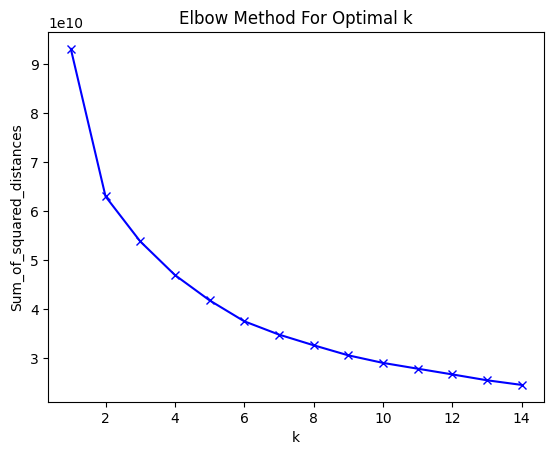

In [11]:
# find the area with the most data points via k-means clustering
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# find number of clusters via elbow method
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(submission)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [12]:
# k-Means Clustering durchführen
kmeans = KMeans(n_clusters=6)  # s.o.: 6 Cluster
kmeans.fit(submission)
labels = kmeans.labels_

# Format of print without exponential
np.set_printoptions(suppress=True)

# Größten Cluster finden
# unique, counts = np.unique(labels, return_counts=True)
# groesster_cluster_index = np.argmax(counts)
# groesster_cluster = submission[labels == groesster_cluster_index]

# Bereich des größten Clusters bestimmen (durch Mittelpunkt und Streuung)
# mittelpunkt = kmeans.cluster_centers_[groesster_cluster_index]
# max_distanz = np.max(np.sqrt(np.sum((groesster_cluster - mittelpunkt)**2, axis=1)))

# print(f"Mittelpunkt des größten Clusters: {mittelpunkt}")
# print(f"Maximale Distanz vom Mittelpunkt: {max_distanz}")

# Größe aller Cluster ausgeben mit deren Mittelpunkt und Streuung
allClusters = []
for i in range(6):
    cluster = submission[labels == i]
    mittelpunkt = kmeans.cluster_centers_[i]
    streuung = np.max(np.sqrt(np.sum((cluster - mittelpunkt)**2, axis=1)))
    # get the ranges of the clusters
    min_value = np.min(cluster, axis=0)
    max_value = np.max(cluster, axis=0)
    # calculate the mean and std of each attribute in the cluster
    print(f"Cluster {i}:")
    means = []
    stds = []
    for j in range(8):
        means.append(np.mean(cluster.iloc[:, j]))
        stds.append(np.std(cluster.iloc[:, j]))
        # print(f"Attribute {j}: Mittelwert: {np.mean(cluster.iloc[:, j])}, Standardabweichung: {np.std(cluster.iloc[:, j])}")
    allClusters.append((i, cluster, len(cluster), mittelpunkt, streuung, min_value, max_value, means, stds))
    # print(cluster)
    print(f"Cluster {i}: {len(cluster)} Datenpunkte, Mittelpunkt: {mittelpunkt}, Streuung: {streuung}, Min: + Max: (Range), Mittelwerte, Standardabweichungen")

Cluster 0:
Cluster 0: 10011 Datenpunkte, Mittelpunkt: [1224.49442027   54.8305793  1211.33832287  471.36991403   -0.52006319
 1522.99734841 3217.19852606   56.18111557    1.        ], Streuung: 1468.8845495177432, Min: + Max: (Range), Mittelwerte, Standardabweichungen
Cluster 1:
Cluster 1: 9081 Datenpunkte, Mittelpunkt: [1870.86728295   73.06580858 2055.7812702   718.53241668    0.7065883
 2097.08598654 3339.37606847   58.23960091    1.        ], Streuung: 1459.0963457875193, Min: + Max: (Range), Mittelwerte, Standardabweichungen
Cluster 2:
Cluster 2: 10189 Datenpunkte, Mittelpunkt: [1868.60514199   70.23348126 2006.66799183  713.77363979    0.68641986
 2155.86559433 1955.7116763    58.08959487    1.        ], Streuung: 1586.4868227866882, Min: + Max: (Range), Mittelwerte, Standardabweichungen
Cluster 3:
Cluster 3: 9506 Datenpunkte, Mittelpunkt: [1191.49199964   61.92060229 1188.48840206  469.47371611   -0.54399579
 2542.64408629 1838.44576117   56.31632581    1.        ], Streuung: 14

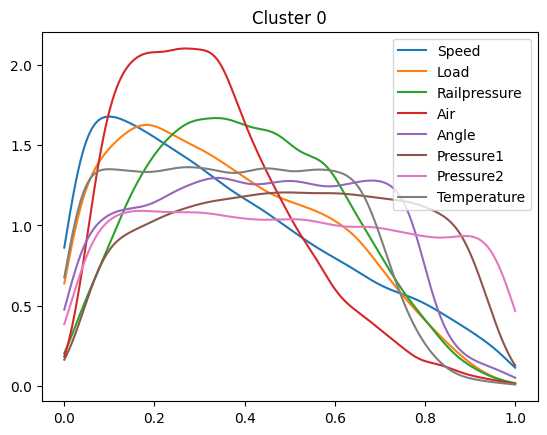

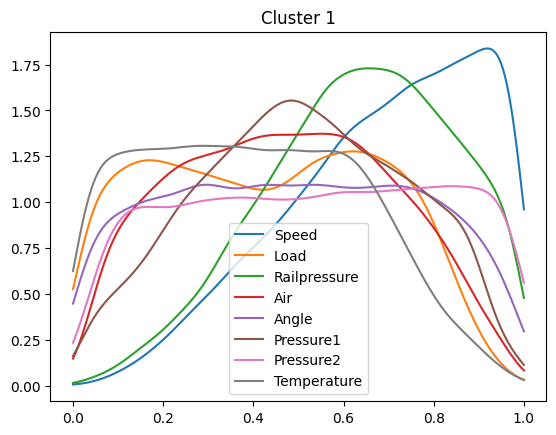

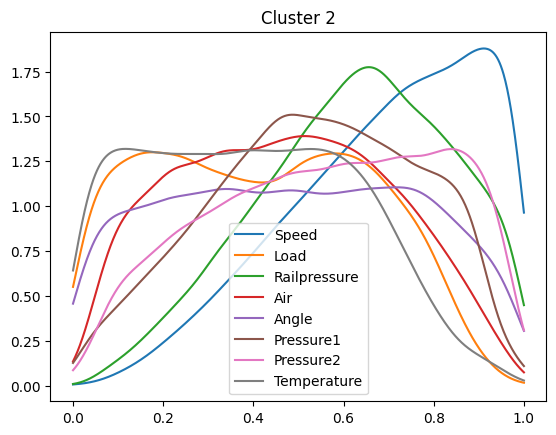

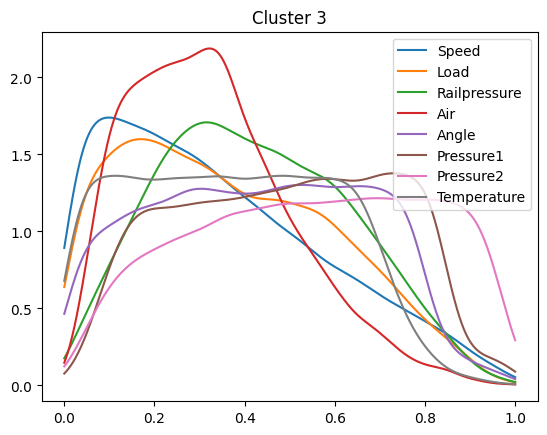

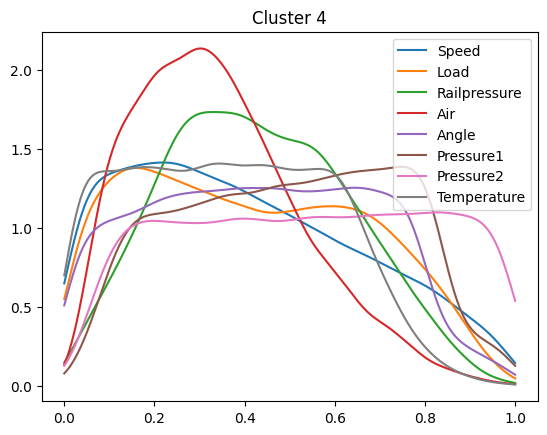

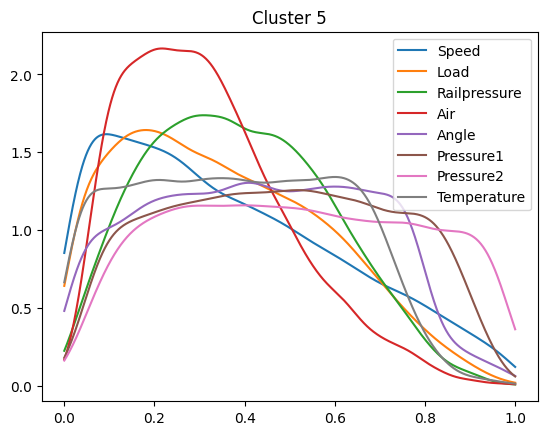

In [13]:
# normalize the cluster data in each cluster
normalizedClusters = []
for i in range(6):
    cluster = allClusters[i][1]
    # cluster drop last column (Type bool)
    cluster = cluster.drop(columns=['feasible'])
    min_value = allClusters[i][5]
    max_value = allClusters[i][6]
    for index, row in cluster.iterrows():
        for col in cluster.columns:  # Verwenden Sie die Spaltennamen direkt
            #print(type(row[col]))
            cluster.at[index, col] = (row[col] - min_value[col]) / (max_value[col] - min_value[col])
    normalizedClusters.append(cluster)

from scipy.stats import gaussian_kde

for j in range(6):
    # KDE-Instanz erstellen für jeden normalisierten Cluster
    cluster = normalizedClusters[j]
    
    # get the column names
    column_names = cluster.columns.values

    kdes = []
    densities = []
    values = np.linspace(0, 1, 1000)
    for i in range(8):
        kde = gaussian_kde(cluster.iloc[:, i])
        kdes.append(kde)
        densities.append(kde.evaluate(values))

    # Dichtefunktionen für die normalisierten Werte plotten
    for i in range(8):
        plt.plot(values, densities[i], label=cluster.columns.values[i])
        plt.title(f"Cluster {j}")
    plt.legend()
    plt.show()

In [33]:
# Find the percentages of size of the clusters in respect to the whole data submission
cluster_sizes = []
for i in range(6):
    cluster_size = allClusters[i][2]/len(submission)
    cluster_sizes.append(cluster_size)
    print(f"Cluster {i} size in %: {cluster_size*100}%")

Cluster 0 size in %: 17.292544738478547%
Cluster 1 size in %: 15.686105161334899%
Cluster 2 size in %: 17.600013818835073%
Cluster 3 size in %: 16.420230774545704%
Cluster 4 size in %: 17.302908864782697%
Cluster 5 size in %: 15.698196642023078%


In [63]:
# Generate new data points for each cluster based on the density function of each attribute
import math

def generate_new_data_points(nmbOfPoints):
    new_data = []
    new_data_strings = []
    for i in range(6):
        cluster = allClusters[i][1]
        new_data_points = []
        nmbPerCluster = math.ceil(cluster_sizes[i]*nmbOfPoints)
        # print("Number of new data points: ", nmbPerCluster)
        for j in range(8):
            kde = gaussian_kde(cluster.iloc[:, j])
            new_data_points.append(kde.resample(nmbPerCluster)[0])
        new_data_points = np.array(new_data_points).T
        new_data.append(new_data_points)
    return new_data 

new_data = generate_new_data_points(20)

for i in range(len(new_data)):
    print(new_data[i].shape)

(4, 8)
(4, 8)
(4, 8)
(4, 8)
(4, 8)
(4, 8)


In [64]:
# check new_data feasibility
feasibleDataPoints = []
for i in range(len(new_data)):
    for j in range(len(new_data[i])):
        #print(new_data[i][j])
        x1, x2, x3, x4, x5, x6, x7, x8 = new_data[i][j]
        # print(x1, x2, x3, x4, x5, x6, x7, x8)
        if is_feasible(x1, x2, x3, x4, x5, x6, x7, x8):
            feasibleDataPoints.append(new_data[i][j])

# print(feasibleDataPoints)
# for i in range(len(feasibleDataPoints)):
#     semicolon_seperated_string = ";".join(map(str, feasibleDataPoints[i]))
#     print(semicolon_seperated_string)

In [65]:
# check feasibleData safety via classifier
X = feasibleDataPoints
safeDataPoints = []
y_pred = clf.predict(X)
print(y_pred)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        safeDataPoints.append(X[i])

print(len(safeDataPoints) == len(y_pred[y_pred == 0]))

# print(feasibleDataPoints)
for i in range(len(feasibleDataPoints)):
    semicolon_seperated_string = ";".join(map(str, feasibleDataPoints[i]))
    print(semicolon_seperated_string)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True
816.4712565906533;37.609734587256995;900.1427871055062;228.42045796100746;-8.592515890505748;1981.8799610478413;3509.5803914574226;48.709871706251796
987.4114939596939;47.15993637410995;956.1460928305914;355.8552731105252;-5.385728122972591;1032.9742370562933;2954.236837365604;50.21321767479369
1660.8046742693305;97.00514103413603;2430.4020502037392;326.2103746033056;-2.241785440246901;2905.8739506124602;3092.260464641327;49.9108118799501
1723.8493485032727;133.3610135382154;1179.1853689749473;699.3663563230035;-6.593938041694512;2504.8377191913646;3323.493839330111;80.9574575651513
1841.1600863424358;36.203597259771314;2114.4838170102657;696.2218660720604;9.58036525466229;1569.215122359206;3496.886315215102;71.92286192949594
2183.25772039929;47.490671963377025;1444.360083928377;650.760362168102;4.574534520445509;1214.9244253869156;2534.9048562203484;63.45492422692431
1896.59116143815;97.30339990658084;1351.5085464909785;827.0400215548999;-3.22203

/Users/lauraschone/Desktop/repos/force-push/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Next try: Gleichverteilung der Daten auf Speed and load, entnehme Slices aus submission

[[700.0, 7.33, 500.9, 78.3753, 1.91, 967.5, 1027.3, 65.5], [900.0, 7.36, 637.4, 104.7771, 3.4, 984.7, 1063.6, 61.7], [1000.0, 19.62, 916.6, 126.0233, 3.75, 1001.3, 1083.3, 64.0], [1200.0, 14.08, 962.3, 142.5829, 3.92, 1008.7, 1119.0, 68.6], [1400.0, 8.93, 967.2, 168.8364, 4.87, 1036.6, 1169.0, 70.4], [1500.0, 9.43, 1040.7, 175.131, 5.75, 1037.5, 1187.1, 72.7], [1700.0, 10.25, 1165.0, 245.5282, 6.43, 1082.8, 1216.5, 67.3], [700.0, 25.85, 577.6, 118.0673, 0.94, 1017.6, 1063.8, 53.4], [2000.0, 11.63, 1663.3, 292.945, 5.87, 1093.5, 1250.3, 68.0], [2200.0, 12.6, 2294.6, 321.2649, 5.7, 1084.5, 1251.6, 68.0]]
